<a href="https://colab.research.google.com/github/Ajjaf/CaseStudy_Hw/blob/main/Insight_Engineers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [110]:
MedianHousehold_df = pd.read_csv("/content/MEHOINUSNYA672N.csv")
MinimumWage_df = pd.read_csv("/content/alfredgraph (1).csv")
medianAskingRent = pd.read_csv("/content/medianAskingRent_All (1).csv")
unemployment_df = pd.read_excel("/content/unemployment.xlsx")
poverty_df = pd.read_excel("/content/poverty line.xlsx")
demographic_df = pd.read_csv("/content/demografic nyc data.csv")

# Data Cleaning

In [76]:
MedianHousehold_df

,DATE,MEHOINUSNYA672N
0,1984-01-01,57910
1,1985-01-01,60100
2,1986-01-01,62600
3,1987-01-01,63840
4,1988-01-01,67470
5,1989-01-01,70400
6,1990-01-01,67340
7,1991-01-01,65390
8,1992-01-01,62290
9,1993-01-01,62040


In [77]:
# Renaming columns
MedianHousehold_df.rename(columns={"MEHOINUSNYA672N": "MedianHousehold_Income"}, inplace = True)
MinimumWage_df.rename(columns={"STTMINWGNY_20230101": "MinimumWage_2023", "STTMINWGNY_20240101": "MinimumWage_2024"}, inplace = True)

In [79]:
MedianHousehold_df.head()

,DATE,MedianHousehold_Income
0,1984-01-01,57910
1,1985-01-01,60100
2,1986-01-01,62600
3,1987-01-01,63840
4,1988-01-01,67470


In [80]:
MinimumWage_df.head()

,DATE,MinimumWage_2023,MinimumWage_2024
0,2014-01-01,8,8.00
1,2015-01-01,8.75,8.75
2,2016-01-01,9,9.00
3,2017-01-01,9.7,9.70
4,2018-01-01,10.4,10.40


In [81]:
# Converting dtypes
MedianHousehold_df['DATE'] = pd.to_datetime(MedianHousehold_Income['DATE'])
MedianHousehold_df.dtypes

### Visualizations

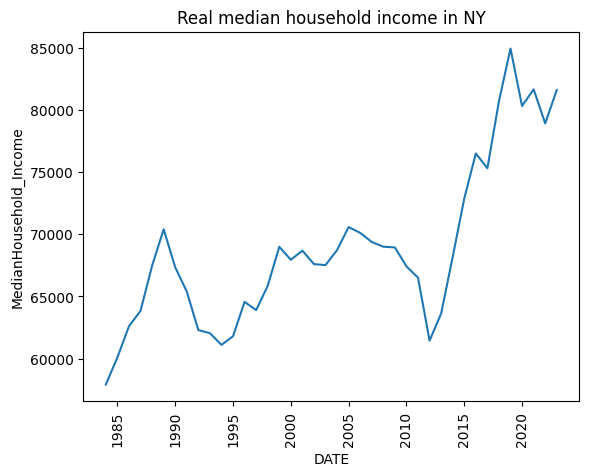

In [83]:
# Median household income
sns.lineplot(x = "DATE", y = "MedianHousehold_Income", data = MedianHousehold_df)
plt.title("Real median household income in NY")
plt.xticks(rotation=90)
plt.show()

In [88]:
unemployment_df

,Year,Jan
0,2014,665256
1,2015,542353
2,2016,462285
3,2017,460194
4,2018,440780
5,2019,392033
6,2020,401889
7,2021,814810
8,2022,499466
9,2023,396454


In [93]:
unemployment_df.dtypes

,0
Year,int64
Jan,int64


In [89]:

# Convert the 'DATE' column to datetime objects if it's not already
# MedianHousehold_df['DATE'] = pd.to_datetime(MedianHousehold_df['DATE'])
sliced_df = MedianHousehold_df[(MedianHousehold_df['DATE'] >= '2014-01-01') & (MedianHousehold_df['DATE'] <= '2023-01-01')]
sliced_df

,DATE,MedianHousehold_Income
30,2014-01-01,68180
31,2015-01-01,72870
32,2016-01-01,76500
33,2017-01-01,75310
34,2018-01-01,80700
35,2019-01-01,84940
36,2020-01-01,80320
37,2021-01-01,81660
38,2022-01-01,78920
39,2023-01-01,81600


<ipython-input-94-583a4d11782c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df['Year'] = sliced_df['DATE'].dt.year


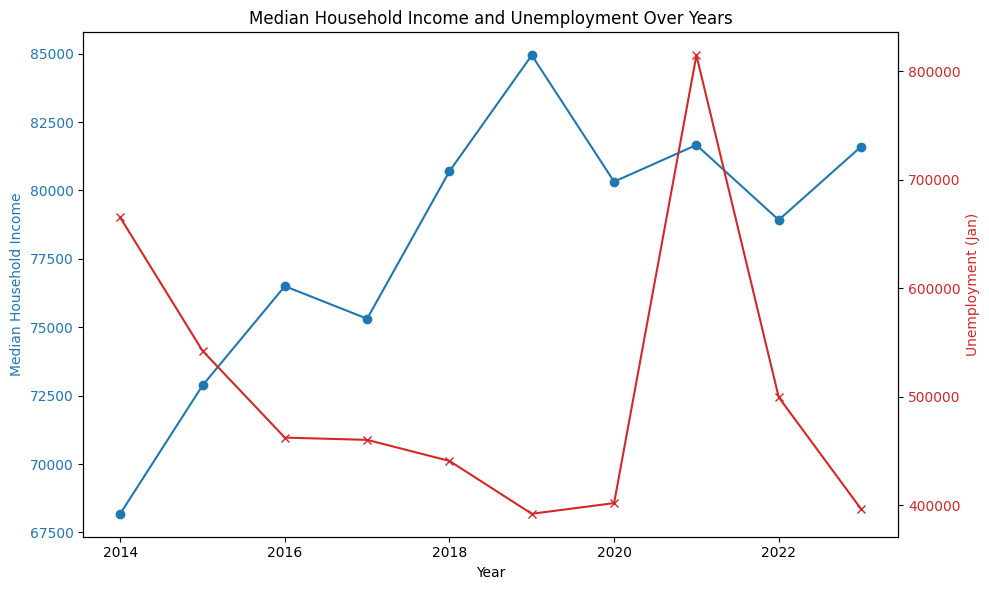

In [94]:
# Set the date index for sliced_df for consistent plotting
sliced_df['Year'] = sliced_df['DATE'].dt.year

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MedianHousehold_Income on the primary y-axis
ax1.plot(sliced_df['Year'], sliced_df['MedianHousehold_Income'], color="tab:blue", marker="o", label="Median Household Income")
ax1.set_xlabel("Year")
ax1.set_ylabel("Median Household Income", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Creating the second y-axis for unemployment data
ax2 = ax1.twinx()
ax2.plot(unemployment_df['Year'], unemployment_df['Jan'], color="tab:red", marker="x", label="Unemployment (Jan)")
ax2.set_ylabel("Unemployment (Jan)", color="tab:red")
ax2.tick_params(axis='y', labelcolor="tab:red")

# Title and layout
plt.title("Median Household Income and Unemployment Over Years")
fig.tight_layout()
plt.show()

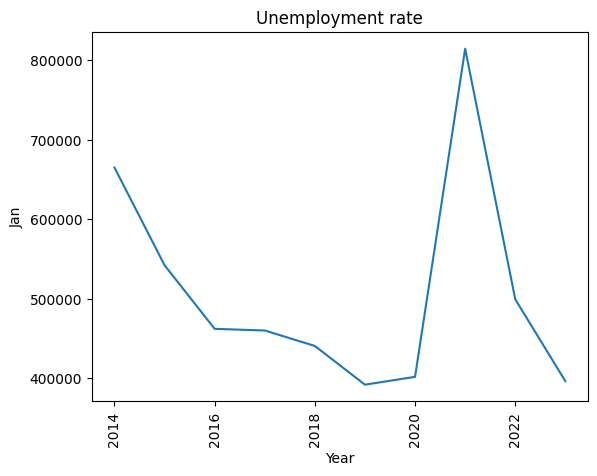

In [95]:
sns.lineplot(x = "Year", y = "Jan", data = unemployment_df)
plt.title("Unemployment rate")
plt.xticks(rotation=90)
plt.show()

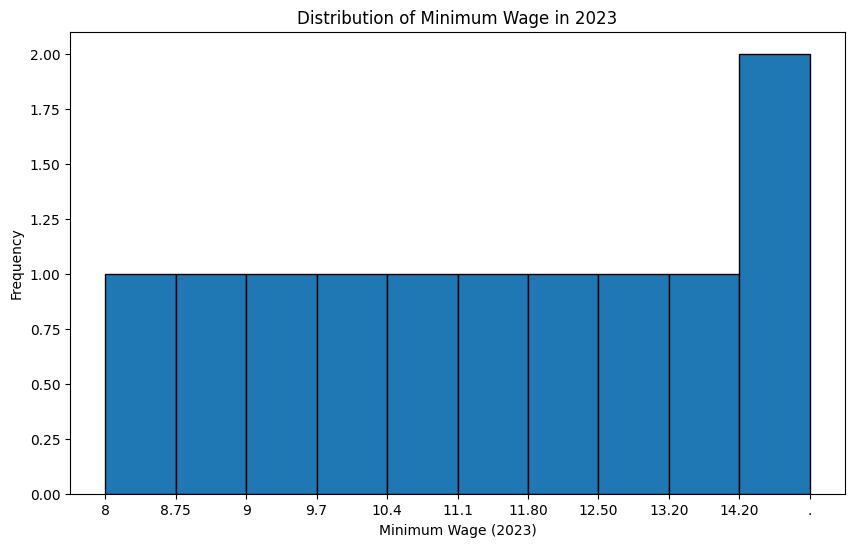

In [104]:
# prompt: MinimumWage_df histogram on this dataset

# Histogram of Minimum Wage
plt.figure(figsize=(10, 6))
plt.hist(MinimumWage_df['MinimumWage_2023'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel('DATE')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Wage in 2023')
plt.show()

In [100]:
MinimumWage_df.drop(columns=['MinimumWage_2024'], inplace=True)

In [102]:
MinimumWage_df.head()

,DATE,MinimumWage_2023
0,2014-01-01,8
1,2015-01-01,8.75
2,2016-01-01,9
3,2017-01-01,9.7
4,2018-01-01,10.4


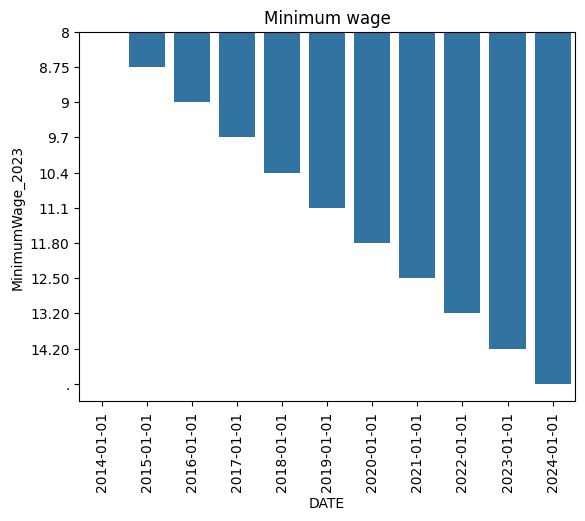

In [107]:
sns.barplot(x = "DATE", y = "MinimumWage_2023", data = MinimumWage_df)
plt.title("Minimum wage")
plt.xticks(rotation=90)
plt.show()

In [101]:
poverty_df.head()

,Year,US,NYC
0,2014,46.7,1.7
1,2015,43.1,1.7
2,2016,40.6,1.6
3,2017,39.7,1.6
4,2018,38.1,1.6


In [ ]:
 sliced_df unemployment_df

In [62]:
#Assuming 'df' is your DataFrame
# Extract only the columns that represent months
month_cols = medianAskingRent.columns[medianAskingRent.columns.str.match(r'^\d{4}-\d{2}$')]

# Calculate the mean rent for each year
for year in range(2010, 2025):  # Adjust the range based on your dataset
    # Select columns for the specific year
    year_cols = [col for col in month_cols if col.startswith(str(year))]
    # Calculate the mean across the year columns and add a new column
    medianAskingRent[f'{year}_mean'] = medianAskingRent[year_cols].mean(axis=1, skipna=True)

# Drop the monthly columns if only yearly means are needed
medianAskingRent = medianAskingRent.drop(columns=month_cols)

# Display the resulting DataFrame with yearly mean rents
medianAskingRent.head()

,areaName,Borough,areaType,2010_mean,2011_mean,2012_mean,2013_mean,2014_mean,2015_mean,2016_mean,2017_mean,2018_mean,2019_mean,2020_mean,2021_mean,2022_mean,2023_mean,2024_mean
0,All Downtown,Manhattan,submarket,3246.083333,3440.666667,3546.666667,3554.583333,3611.833333,3718.750000,3763.833333,3691.000000,3782.583333,3961.083333,3569.250000,3730.000000,4742.250000,4836.666667,4927.777778
1,All Midtown,Manhattan,submarket,2972.500000,3282.166667,3364.583333,3389.166667,3423.333333,3514.083333,3515.833333,3471.583333,3474.166667,3637.916667,3253.333333,3449.333333,4341.750000,4440.000000,4474.444444
2,All Upper East Side,Manhattan,submarket,2517.750000,2648.750000,2751.916667,2794.500000,2736.666667,2940.166667,2976.750000,2962.250000,2912.083333,3057.333333,2881.500000,2697.500000,3610.666667,3986.250000,3948.666667
3,All Upper Manhattan,Manhattan,submarket,1840.583333,1931.916667,2000.250000,2041.666667,2094.416667,2244.166667,2363.500000,2336.083333,2346.750000,2409.166667,2357.500000,2264.000000,2597.250000,2806.500000,2948.333333
4,All Upper West Side,Manhattan,submarket,2881.250000,3151.500000,3245.583333,3225.333333,3248.500000,3402.500000,3424.000000,3328.333333,3333.333333,3487.333333,3185.250000,3230.000000,4299.416667,4442.833333,4405.222222


In [86]:
medianAskingRent.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3015.0,3100.0,3100.0,3200.0,3195.0,...,4750.0,4800.0,4850.0,4895.0,4960.0,5000.0,4995.0,4950.0,4950.0,4950.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,...,4330.0,4420.0,4400.0,4400.0,4495.0,4550.0,4505.0,4500.0,4500.0,4500.0
2,All Upper East Side,Manhattan,submarket,2450.0,2450.0,2400.0,2500.0,2565.0,2570.0,2595.0,...,3950.0,3950.0,3995.0,3950.0,3900.0,3948.0,3900.0,3955.0,3950.0,3990.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2795.0,2800.0,2900.0,2850.0,2995.0,3000.0,3000.0,3050.0,3000.0,2940.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,4250.0,4250.0,4300.0,4425.0,4500.0,4500.0,4399.0,4450.0,4400.0,4423.0


In [63]:
medianAskingRent.to_excel("medianAskingRent.xlsx", index=False)

In [ ]:
#Sample data, replace this with your actual DataFrame
data = {
    "Borough": ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"],
    "2014 Average": [1378.90, 2273.80, 3343.53, 1839.66, 1657.92],
    "2015 Average": [1488.55, 2358.30, 3459.08, 1901.21, 1690.08],
    "2016 Average": [1609.03, 2449.68, 3585.31, 1994.34, 1988.75],
    "2017 Average": [1710.67, 2409.35, 3467.00, 2072.42, 1924.25],
    "2018 Average": [1806.88, 2460.25, 3500.61, 2090.62, 1885.75],
    "2019 Average": [1858.09, 2558.52, 3639.75, 2098.78, 2017.75],
    "2020 Average": [1883.89, 2509.42, 3365.46, 2108.40, 1945.42],
    "2021 Average": [1944.45, 2447.83, 3429.89, 2056.87, 1965.08],
    "2022 Average": [2068.33, 3038.85, 4290.59, 2312.90, 2039.25],
    "2023 Average": [2243.17, 3256.82, 4532.94, 2543.85, 2095.33],
}
rent_df = pd.DataFrame(data)

# Reshape the DataFrame from wide to long format for plotting
rent_long_df = rent_df.melt(id_vars="Borough", var_name="Year", value_name="Average Rent")

# Remove the "_mean Average" part from the 'Year' column to get just the year
rent_long_df["Year"] = rent_long_df["Year"].str.extract(r'(\d{4})').astype(int)

# Plot the data using matplotlib
plt.figure(figsize=(10, 6))
for borough in rent_long_df["Borough"].unique():
    borough_data = rent_long_df[rent_long_df["Borough"] == borough]
    plt.plot(borough_data["Year"], borough_data["Average Rent"], label=borough)

# Customize the plot
plt.title("Average Rent by Borough and Year")
plt.xlabel("Year")
plt.ylabel("Average Rent")
plt.legend(title="Borough")
plt.grid(True)

# Show the plot
plt.show()

In [111]:
demographic_df.head()

,Label (Grouping),"New York city, New York",Unnamed: 2,Unnamed: 3
0,Total:,"8,804,190",NaN,NaN
1,Population of one race:,"7,917,093",NaN,NaN
2,White alone,"3,000,945",NaN,NaN
3,Black or African American alone,"1,943,645",NaN,NaN
4,American Indian and Alaska Native alone,"86,218",NaN,NaN


# Predictive modelling

In [ ]:
forecast = fitted_model.forecast(steps=len(test))
test = test.to_frame()
test['Predicted'] = forecast.values

In [118]:
MedianHousehold_df.head()

,DATE,MedianHousehold_Income
0,1984-01-01,57910
1,1985-01-01,60100
2,1986-01-01,62600
3,1987-01-01,63840
4,1988-01-01,67470


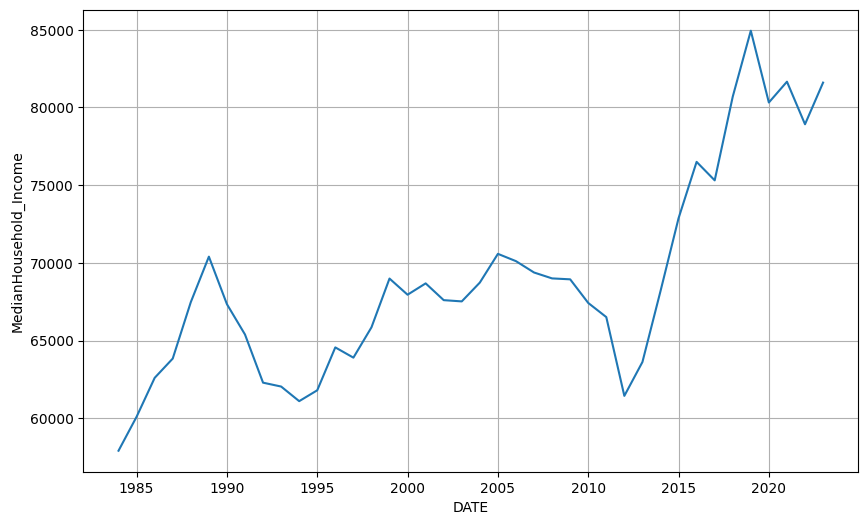

In [128]:
plt.figure(figsize=(10,6))
plt.xlabel("DATE")
plt.ylabel("MedianHousehold_Income")
plt.plot(MedianHousehold_df['MedianHousehold_Income'])
plt.grid()
plt.show()

In [162]:
X,y=[], []
lag= 36
for i in range(len(data)-lag-1):
  X.append(data.iloc[i:i+lag,1])
  y.append(data.iloc[i+lag,1])

X[0], y[0]

lag = 36
for i in range(len(data) - lag - 1):
    X.append(data.iloc[i:i+lag, 1])
    y.append(data.iloc[i+lag, 1])

X[0], y[0]

IndexError: list index out of range

In [154]:
X, y = [], []
lag = 39
for i in range(len(MedianHousehold_df) - lag):
    X.append(MedianHousehold_df['MedianHousehold_Income'].iloc[i:i + lag])
    y.append(MedianHousehold_df['MedianHousehold_Income'].iloc[i + lag])

X[0], y[0]

(DATE
 1984-01-01    57910
 1985-01-01    60100
 1986-01-01    62600
 1987-01-01    63840
 1988-01-01    67470
 1989-01-01    70400
 1990-01-01    67340
 1991-01-01    65390
 1992-01-01    62290
 1993-01-01    62040
 1994-01-01    61100
 1995-01-01    61800
 1996-01-01    64560
 1997-01-01    63900
 1998-01-01    65850
 1999-01-01    68990
 2000-01-01    67950
 2001-01-01    68680
 2002-01-01    67600
 2003-01-01    67520
 2004-01-01    68730
 2005-01-01    70580
 2006-01-01    70110
 2007-01-01    69380
 2008-01-01    69000
 2009-01-01    68940
 2010-01-01    67420
 2011-01-01    66510
 2012-01-01    61440
 2013-01-01    63620
 2014-01-01    68180
 2015-01-01    72870
 2016-01-01    76500
 2017-01-01    75310
 2018-01-01    80700
 2019-01-01    84940
 2020-01-01    80320
 2021-01-01    81660
 2022-01-01    78920
 Name: MedianHousehold_Income, dtype: int64,
 81600)

In [155]:
X=np.squeeze(X)
y=np.squeeze(y)
X[0], y[0]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [148]:
split_idx = len(y)
x_train, y_train = X[:-split_idx], y[:-split_idx]
x_test, y_test = X[-split_idx:], y[-split_idx:]

plt.figure(figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Median Household Income")

# Adjusted to use MedianHousehold_df.index
plt.plot(MedianHousehold_df.index[lag + 1: -split_idx], y_train, label='Training')
plt.plot(MedianHousehold_df.index[-split_idx:], y_test, label='Testing')

plt.legend()
plt.grid()
plt.show()

TypeError: len() of unsized object

In [141]:
MedianHousehold_Income

,DATE,MedianHousehold_Income
0,1984-01-01,57910
1,1985-01-01,60100
2,1986-01-01,62600
3,1987-01-01,63840
4,1988-01-01,67470
5,1989-01-01,70400
6,1990-01-01,67340
7,1991-01-01,65390
8,1992-01-01,62290
9,1993-01-01,62040


In [150]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = MedianHousehold_Income[MedianHousehold_Income.DATE < 2023]
data_test = MedianHousehold_Income[MedianHousehold_Income.DATE >= 2023]
    # predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

TypeError: Invalid comparison between dtype=datetime64[ns] and int

In [151]:
MedianHousehold_Income.dtypes

,0
DATE,datetime64[ns]
MedianHousehold_Income,int64


In [156]:
MinimumWage_df

,DATE,MinimumWage_2023
0,2014-01-01,8
1,2015-01-01,8.75
2,2016-01-01,9
3,2017-01-01,9.7
4,2018-01-01,10.4
5,2019-01-01,11.1
6,2020-01-01,11.80
7,2021-01-01,12.50
8,2022-01-01,13.20
9,2023-01-01,14.20


In [168]:
# pip install statsmodels pandas
#!pip install statsmodels
import statsmodels.api as sm

In [ ]:
# Example data: Monthly observations (use your actual data here)
dates = pd.date_range(start="2014-01-01", end="2023-01-01", freq="MS")
values = [100 + i * 0.5 for i in range(len(dates))]  # Synthetic trend data

# Create a DataFrame
df = pd.DataFrame({"Date": dates, "Value": values})
df.set_index("Date", inplace=True)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df, label="Value")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series Data")
plt.legend()
plt.grid()
plt.show()